In [1]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = "5432"
DATABASE = "crowdfunding_db"

In [4]:
# create engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
        
        
engine = create_engine(connection_string)

In [6]:
query = """
        SELECT 
            AVG(pledged)::NUMERIC(10,2),
            country
        FROM 
            campaign
        group by country;
        """
df = pd.read_sql(text(query), con=engine)
df.head()

,avg,country
0,49175.37,AU
1,63927.00,CA
2,36421.55,DK
3,38757.17,CH
4,41165.58,US


<function matplotlib.pyplot.show(close=None, block=None)>

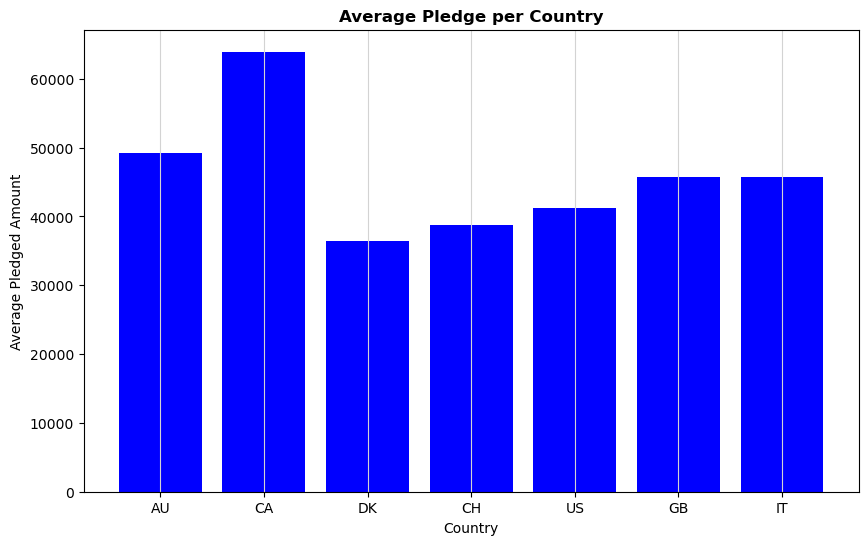

In [10]:
# visualize that dataframe and add it to the report
plt.figure(figsize=(10,6))
plt.bar(df.country, df.avg, color="blue")
plt.title("Average Pledge per Country", fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Average Pledged Amount")
plt.grid(axis="x", color="lightgrey")

plt.show